# Gravitational Waves

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.metrics import accuracy_score, confusion_matrix

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
train_dir = '../input/gravity-spy-gravitational-waves/train/train/'
test_dir = '../input//gravity-spy-gravitational-waves/test/test/'
validation_dir = '../input//gravity-spy-gravitational-waves/validation/validation/'

In [ ]:
class_names = os.listdir(train_dir)

# Preprocessing

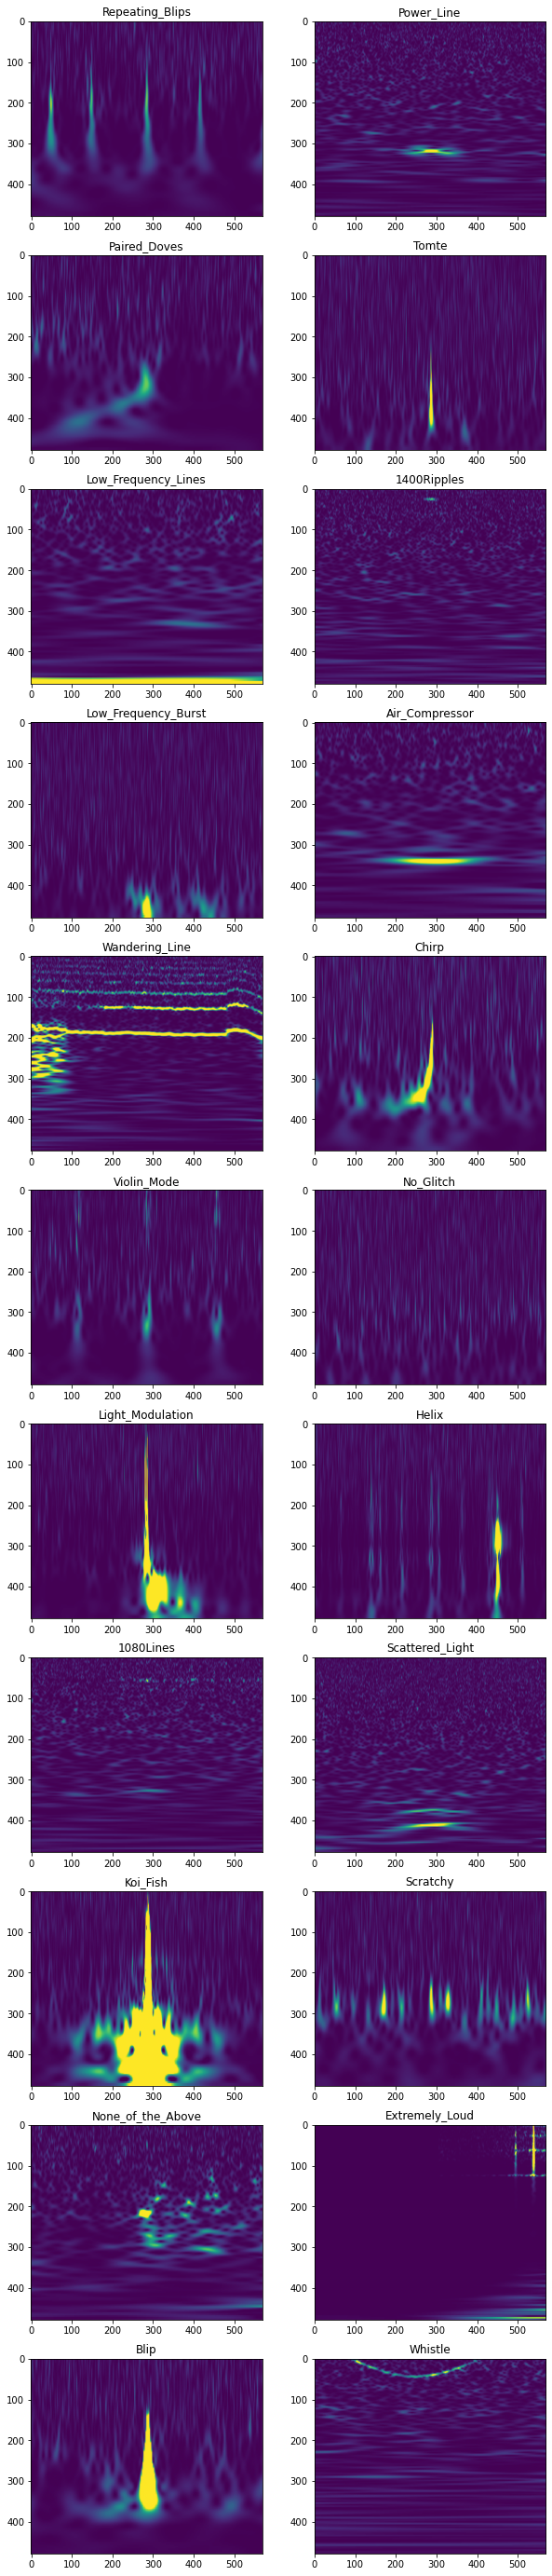

In [ ]:
plt.figure(figsize=(10,50))
for fold, i in zip(class_names,range(0,len(class_names))):

    plt.subplot(11,2, i+1)
    img_read = plt.imread(train_dir+fold+'/'+os.listdir(train_dir+fold)[0])
    plt.imshow(img_read)
    plt.title(class_names[i])

plt.show()

In [ ]:
Batch_size = 128

tr_gen = ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

val_gen =  ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

ts_gen =  ImageDataGenerator(rescale = 1./255.,
                           samplewise_center=True,
                           samplewise_std_normalization=True)

In [ ]:
tr_gen = tr_gen.flow_from_directory(train_dir,
                                  batch_size=Batch_size,
                                  classes=class_names,
                                  class_mode='categorical',
                                  shuffle=True,
                                  target_size=(300,300),
                                  seed= 42)

Found 22348 images belonging to 22 classes.


In [ ]:
val_gen = val_gen.flow_from_directory(validation_dir,
                                      batch_size=Batch_size,
                                      classes=class_names,
                                      class_mode='categorical',
                                      shuffle=True,
                                      target_size=(300,300),
                                      seed= 42)

Found 4800 images belonging to 22 classes.


In [ ]:
ts_gen = ts_gen.flow_from_directory(test_dir,
                                  batch_size=Batch_size,
                                  classes=class_names,
                                  class_mode='categorical',
                                  shuffle=False,
                                  target_size=(300,300),
                                  seed= 42)

Found 4720 images belonging to 22 classes.


# CNN Model

## Architecture

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='valid', strides=(2,2), activation = 'tanh', input_shape = (300,300,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=128, kernel_size=(3,3), padding='valid', strides=(2,2), activation = 'tanh'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(22, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 149, 149, 128)     3584      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 128)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 36, 36, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 41472)             0         
_________________________________________________________________
dense (Dense)                (None, 22)                912406    
Total params: 1,063,574
Trainable params: 1,063,574
Non-trainable params: 0
______________________________________________

## Fitting

In [ ]:
model.compile(optimizer=optimizers.Adam(lr=0.01),
             loss='categorical_crossentropy',
             metrics=['accuracy'])

es = EarlyStopping(monitor='val_loss',mode='min',patience=3,verbose=1)
RLr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience = 2, verbose = 1, min_delta=1e-3,min_lr=1e-6)

history= model.fit(tr_gen,
                 epochs=20,
                 steps_per_epoch=tr_gen.n/Batch_size,
                 validation_data=val_gen,
                 validation_steps=val_gen.n/Batch_size,
                 callbacks=[es,RLr])

Epoch 1/20
174/174 [==============================] - 999s 6s/step - loss: 305.5310 - accuracy: 0.2216 - val_loss: 54.3860 - val_accuracy: 0.5983
Epoch 2/20
174/174 [==============================] - 960s 5s/step - loss: 22.2110 - accuracy: 0.6737 - val_loss: 8.7878 - val_accuracy: 0.7635
Epoch 3/20
174/174 [==============================] - 957s 5s/step - loss: 13.8028 - accuracy: 0.7526 - val_loss: 10.6444 - val_accuracy: 0.7898
Epoch 4/20
174/174 [==============================] - 959s 5s/step - loss: 10.8875 - accuracy: 0.7796 - val_loss: 11.4156 - val_accuracy: 0.8079

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0009999999776482583.
Epoch 5/20
174/174 [==============================] - 956s 5s/step - loss: 4.0928 - accuracy: 0.8967 - val_loss: 2.7006 - val_accuracy: 0.8979
Epoch 6/20
174/174 [==============================] - 956s 5s/step - loss: 1.7863 - accuracy: 0.9230 - val_loss: 2.6270 - val_accuracy: 0.9046
Epoch 7/20
174/174 [==============================] -

In [ ]:
### Evaluation

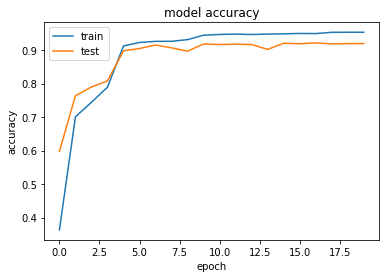

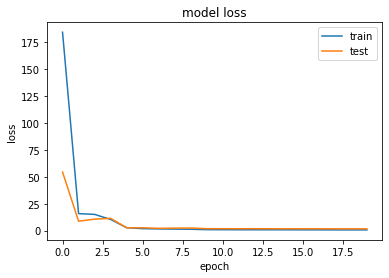

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

# Predictions

In [ ]:
Y_pred = model.predict(ts_gen,steps=np.ceil(ts_gen.n/Batch_size))
Y_pred = np.argmax(Y_pred, axis=1)
Y_ts = ts_gen.classes

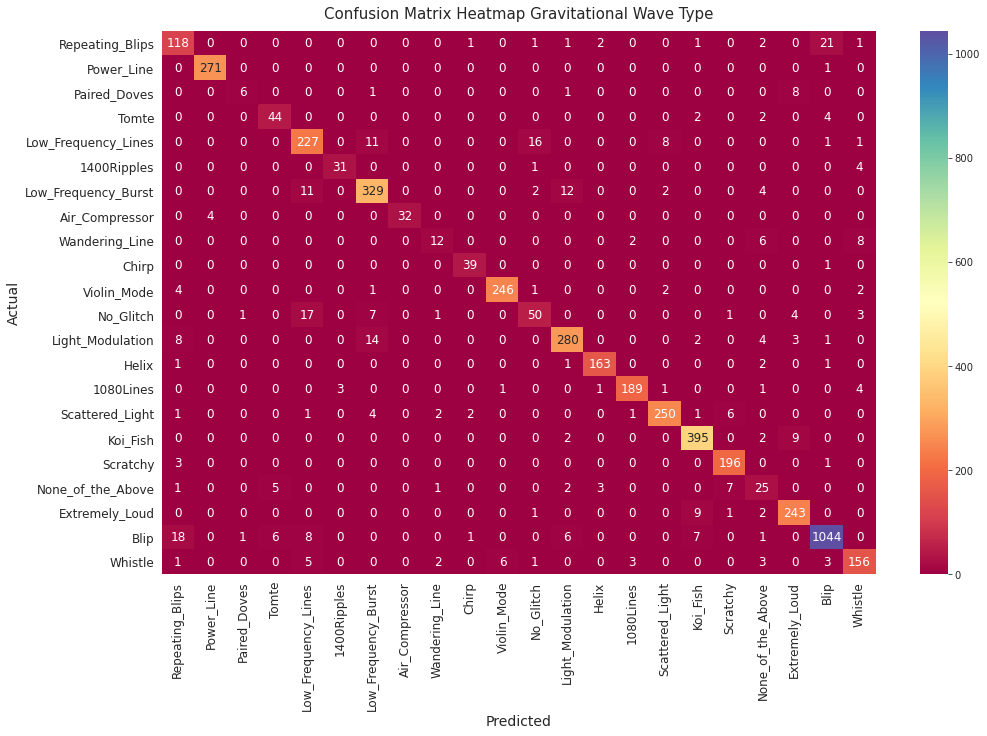

-Accuracy achieved: 92.08%
-Accuracy by model: 95.30%
-Accuracy by validation: 91.92%


In [ ]:
conf_mat = confusion_matrix(Y_ts,Y_pred)
sns.set_style(style='white')
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(conf_mat,vmin=np.min(conf_mat.all()), vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":12},cmap='Spectral')
heatmap.set_title('Confusion Matrix Heatmap Gravitational Wave Type', fontdict={'fontsize':15}, pad=12)
heatmap.set_xlabel('Predicted',fontdict={'fontsize':14})
heatmap.set_ylabel('Actual',fontdict={'fontsize':14})
heatmap.set_xticklabels(class_names, fontdict={'fontsize':12,'rotation': 90})
heatmap.set_yticklabels(class_names, fontdict={'fontsize':12,'rotation': 0})
plt.show()

print('-Accuracy achieved: {:.2f}%\n-Accuracy by model: {:.2f}%\n-Accuracy by validation: {:.2f}%'.
      format(accuracy_score(Y_ts,Y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

# Errors Sample

In [ ]:
index=0
index_errors= []

for label, predict in zip(Y_ts,Y_pred):
    if label != predict:
        index_errors.append(index)
    index +=1

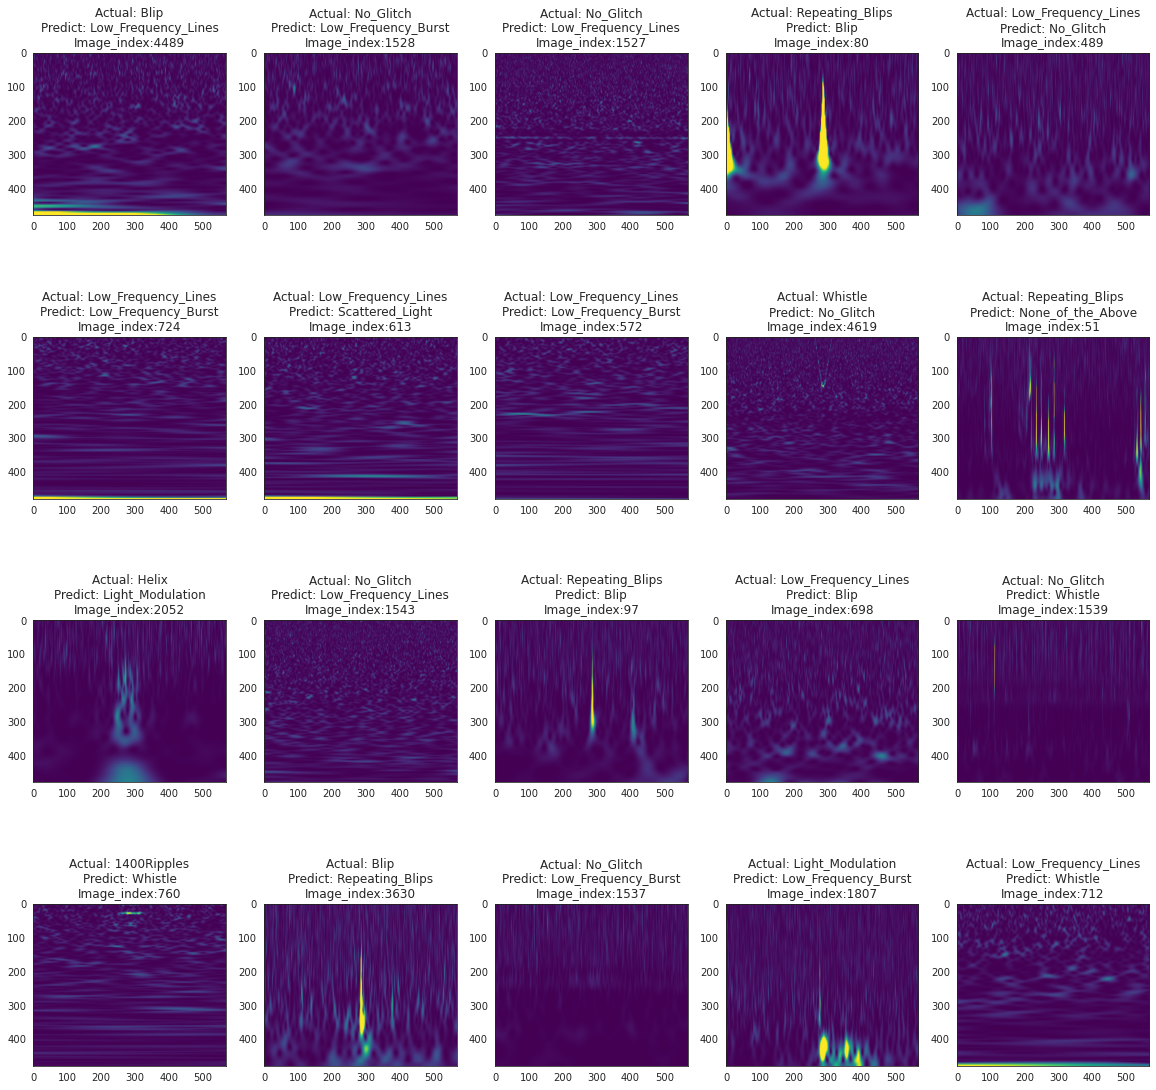

In [ ]:
plt.figure(figsize=(20,20))

for i,img_index in zip(range(1,21),random.sample(index_errors,k=20)):
    plt.subplot(4,5,i)
    img_read = plt.imread(ts_gen.filepaths[img_index])
    plt.imshow(img_read)
    plt.title('Actual: '+str(class_names[Y_ts[img_index]])+'\nPredict: '+str(class_names[Y_pred[img_index]])+'\nImage_index:'+str(img_index))
plt.show()